<a href="https://colab.research.google.com/github/zhanna-naumenko/DI-Bootcamp/blob/main/W5D4_Mini_Project1ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install seaborn

In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = 'https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv'
penguins = pd.read_csv(url)
# print(penguins)
# penguins_null = penguins.isnull().sum()
# print(penguins_null)
penguins.drop_duplicates(inplace=True)
penguins['bill_length_mm'] = penguins['bill_length_mm'].fillna(penguins['bill_length_mm'].mean())
penguins['bill_depth_mm'] = penguins['bill_depth_mm'].fillna(penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm'] = penguins['flipper_length_mm'].fillna(penguins['flipper_length_mm'].mean())
penguins['body_mass_g'] = penguins['body_mass_g'].fillna(penguins['body_mass_g'].mean())
penguins = penguins.dropna()
penguins_null = penguins.isnull().sum()
# print(penguins_null)
print(penguins)
penguins_uniq = penguins['species'].unique()
print(penguins_uniq)
print(penguins.dtypes)
print(penguins.describe())

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0       Adelie  Torgersen            39.1           18.7              181.0   
1       Adelie  Torgersen            39.5           17.4              186.0   
2       Adelie  Torgersen            40.3           18.0              195.0   
4       Adelie  Torgersen            36.7           19.3              193.0   
5       Adelie  Torgersen            39.3           20.6              190.0   
..         ...        ...             ...            ...                ...   
339  Chinstrap      Dream            55.8           19.8              207.0   
340  Chinstrap      Dream            43.5           18.1              202.0   
341  Chinstrap      Dream            49.6           18.2              193.0   
342  Chinstrap      Dream            50.8           19.0              210.0   
343  Chinstrap      Dream            50.2           18.7              198.0   

     body_mass_g     sex  year  
0         3750.0  

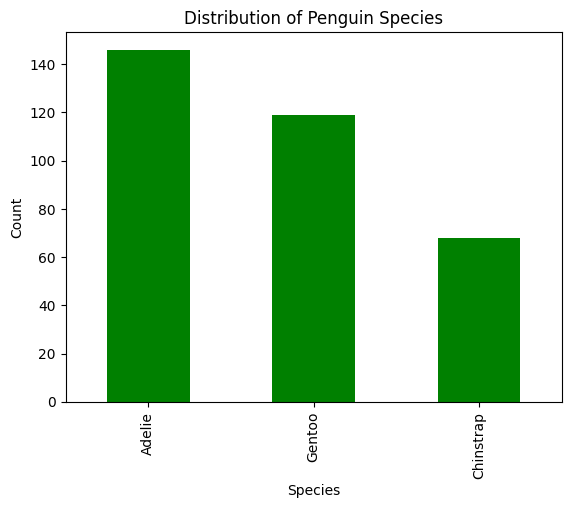

In [49]:
# a bar chart to show the distribution of penguin species
distribution_species = penguins['species'].value_counts()
distribution_species.plot(kind='bar', color='g')
plt.title('Distribution of Penguin Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [50]:
# a scatter plot to analyze the relationship between flipper length and body mass, color-coded by species.
import plotly.express as px
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g", color="species", symbol="species")
fig.update_layout(
    title='Relationship between flipper length and body mass by species',
    xaxis_title='Flipper Length',
    yaxis_title='Body Mass',
    legend_title='Species'
)
fig.show()
fig = px.scatter(penguins, x="flipper_length_mm", y="body_mass_g", color="species", symbol="species", facet_col="sex", facet_row="island")
fig.update_layout(
    title='Relationship between flipper length and body mass by species, sex and island',
    xaxis_title='Flipper Length',
    yaxis_title='Body Mass',
    legend_title='Species'
)
fig.show()


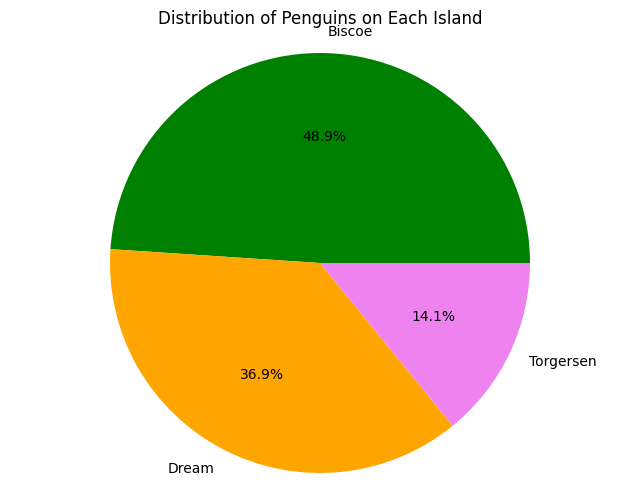

In [36]:
# visualize the count of penguins on each island using a pie chart
island_counts = penguins['island'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(island_counts, labels=island_counts.index, autopct='%1.1f%%', colors=['g', 'orange', 'violet'])
plt.title('Distribution of Penguins on Each Island')
plt.axis('equal')
plt.show()

In [66]:
# grouped bar charts showing the distribution of sex within each penguin species
import numpy as np
cross_tab = pd.crosstab(penguins['species'], penguins['sex'])
# cross_tab.columns = ['Adelie' 'Gentoo' 'Chinstrap']
cross_tab.reset_index(inplace=True)
print(cross_tab)

import plotly.graph_objects as go
species=['Adelie', 'Gentoo', 'Chinstrap']

fig = go.Figure(data=[
    go.Bar(name= 'Female', x=species, y=cross_tab['female']),
    go.Bar(name='Male', x=species, y=cross_tab['male'])
])
fig.update_layout(title='Sex Distribution within Penguin Species',
                  xaxis_title='Species',
                  yaxis_title='Values')
fig.update_layout(barmode='group')
fig.show()

sex    species  female  male
0       Adelie      73    73
1    Chinstrap      34    34
2       Gentoo      58    61


<ipython-input-69-063fe4924066>:4: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



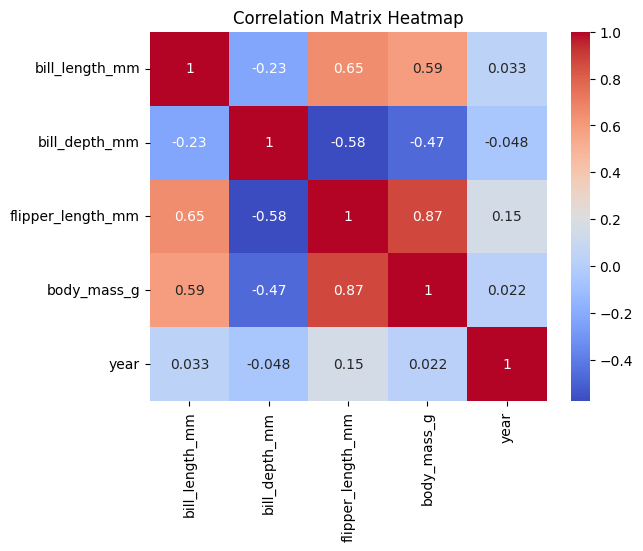

In [69]:
# Plot a heatmap to visualize the correlations between numerical variables
import plotly.express as px

correlation_matrix = penguins.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap")
plt.show()

In [79]:
# boxplots for flipper length, body mass, and bill measurements, segmented by species

import plotly.graph_objects as go
import numpy as np

fig = go.Figure()
for measurement in ['flipper_length_mm', 'body_mass_g', 'bill_depth_mm', 'bill_length_mm']:
    for species in penguins['species'].unique():
        data = penguins[penguins['species'] == species][measurement]
        fig.add_trace(go.Box(y=data, name=species + ' - ' + measurement))

fig.update_layout(title='Boxplots of Penguin Measurements by Species',
                  yaxis_title='Measurements',
                  xaxis_title='Species')
fig.show()

In [81]:
# histograms to show the distribution of key measurements (bill length, bill depth, flipper length)
fig = go.Figure()

for measurement in ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm']:
    fig.add_trace(go.Histogram(x=penguins[measurement], name=measurement))
fig.update_layout(title='Distribution of Key Measurements',
                  xaxis_title='Measurement',
                  yaxis_title='Values')
fig.show()

In [82]:
# combine multiple plots into a single figure (using subplots) to compare different aspects of the data
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd


fig = make_subplots(rows=2, cols=2, subplot_titles=("Bill Length", "Bill Depth", "Flipper Length", "Body Mass"))

fig.add_trace(go.Histogram(x=penguins['bill_length_mm'], name="Bill Length"), row=1, col=1)
fig.add_trace(go.Histogram(x=penguins['bill_depth_mm'], name="Bill Depth"), row=1, col=2)
fig.add_trace(go.Histogram(x=penguins['flipper_length_mm'], name="Flipper Length"), row=2, col=1)
fig.add_trace(go.Histogram(x=penguins['body_mass_g'], name="Body Mass"), row=2, col=2)

fig.update_layout(title_text="Distribution of Penguin Measurements", showlegend=False)

fig.update_xaxes(title_text="Measurement", row=1, col=1)
fig.update_xaxes(title_text="Measurement", row=1, col=2)
fig.update_xaxes(title_text="Measurement", row=2, col=1)
fig.update_xaxes(title_text="Measurement", row=2, col=2)

fig.update_yaxes(title_text="Count", row=1, col=1)
fig.update_yaxes(title_text="Count", row=1, col=2)
fig.update_yaxes(title_text="Count", row=2, col=1)
fig.update_yaxes(title_text="Count", row=2, col=2)

fig.show()

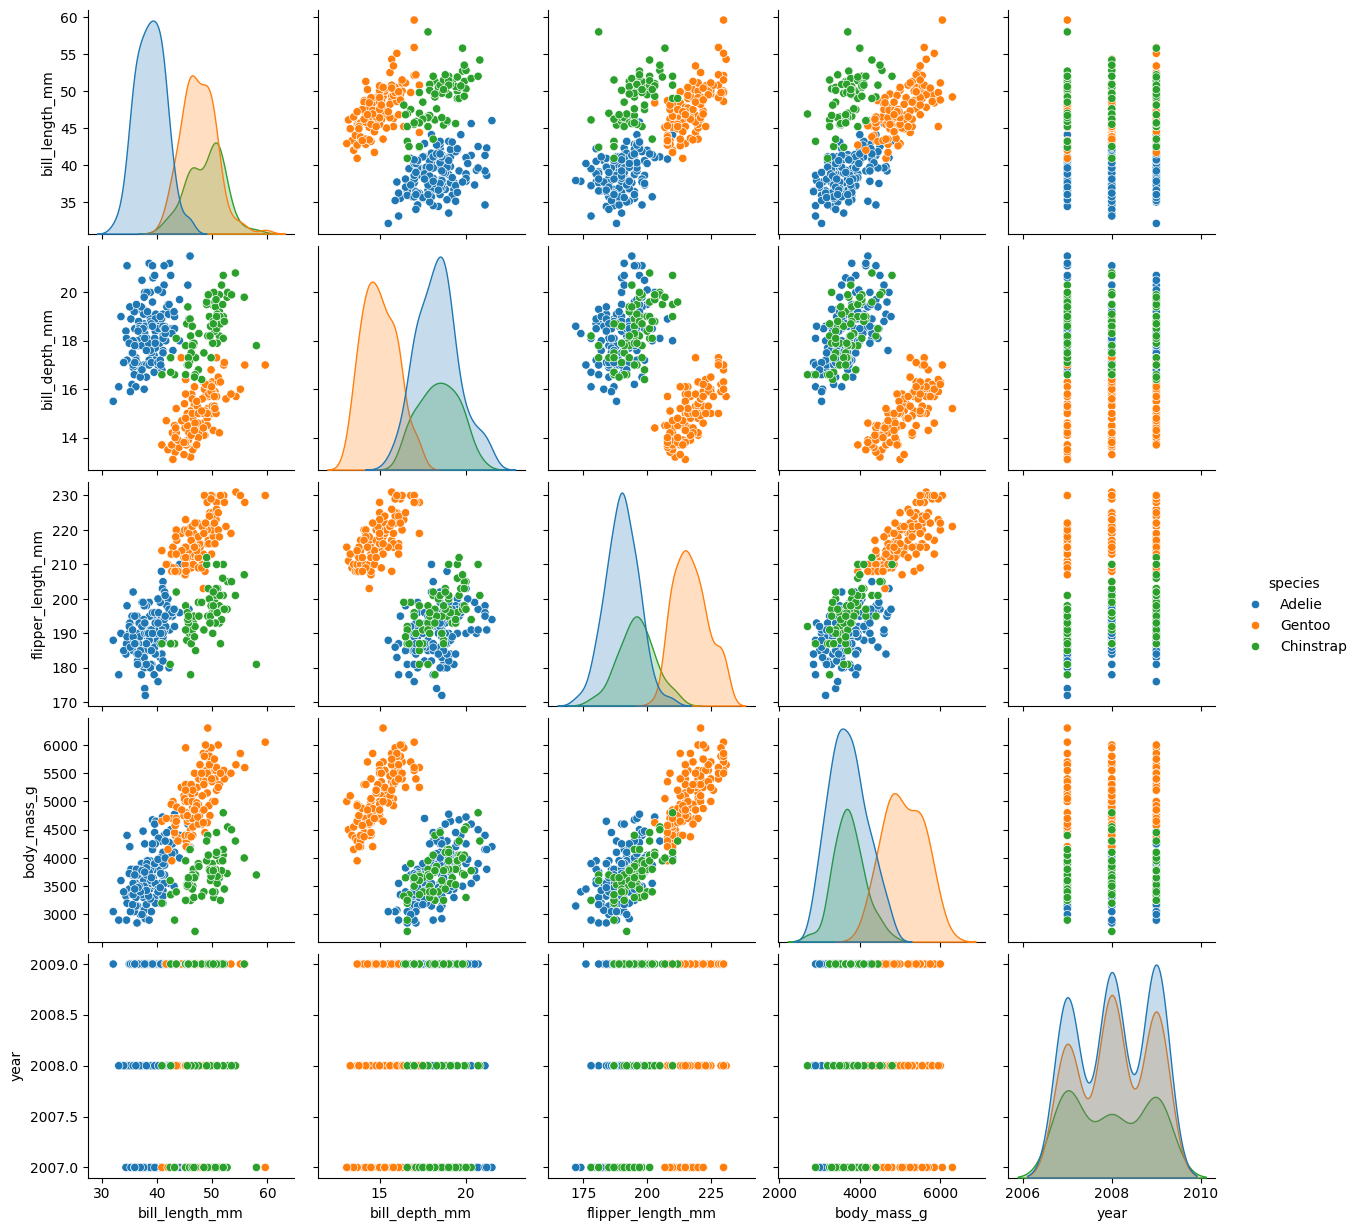

In [86]:
# use Seaborn’s pairplot to visualize pairwise relationships in the dataset

sns.pairplot(penguins, hue="species")

## **Conclusion**
The boxplots for flipper length, body mass, and bill measurements provide insights into the distribution and variability of these measurements within each penguin species.
For example, Gentoo penguins tend to have longer flipper lengths and body masses compared to Adelie and Chinstrap penguins.
The main correlation is between flipper length and body mass.
Overall, these visualizations offer valuable insights into the characteristics and distributions of penguin species across different measurements and attributes. They help in understanding the population demographics and characteristics of penguins in the dataset.